In [1]:
import warnings
warnings.filterwarnings('ignore')

from fastai.vision import *
from fastai.callbacks import *
from fastai.widgets import ClassConfusion

In [2]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [3]:
sz = 456
lr = 0.003
bs = 64

In [4]:
stats = ([0.48746821, 0.48746821, 0.48746821], [0.24557937, 0.24557937, 0.24557937])

def valid_func(o):
    return 'test' in str(o)

def label_func(o):
    name = o.name
    if 'virus' in name:
        return 'virus'
    if 'bacteria' in name:
        return 'bacteria'
    return 'normal'

data = (ImageList.from_folder(data_path)
        .split_by_valid_func(valid_func)
        .label_from_func(label_func)
        .transform(get_transforms(), size=sz)
        .databunch(bs=bs)
        .normalize(stats)
        )

data, data.classes

(ImageDataBunch;
 
 Train: LabelList (5232 items)
 x: ImageList
 Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456)
 y: CategoryList
 normal,normal,normal,normal,normal
 Path: /media/sm2/data/pneumonia/chest_xray;
 
 Valid: LabelList (624 items)
 x: ImageList
 Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456),Image (3, 456, 456)
 y: CategoryList
 normal,normal,normal,normal,normal
 Path: /media/sm2/data/pneumonia/chest_xray;
 
 Test: None,
 ['bacteria', 'normal', 'virus'])

In [5]:
learn = cnn_learner(data, 
                    models.resnet50,
                    bn_wd=False,
                    metrics=error_rate,
                    loss_func=LabelSmoothingCrossEntropy(),
                    callback_fns=[BnFreeze,
                                  partial(SaveModelCallback, monitor='error_rate', name='best_error')
                                 ],
                   ).to_fp16()

In [6]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.205102,1.001543,0.274038,01:09
1,0.860289,0.652487,0.153846,01:05
2,0.717703,0.651602,0.158654,01:05
3,0.650347,0.633215,0.166667,01:06
4,0.617389,0.593682,0.134615,01:10


Better model found at epoch 0 with error_rate value: 0.2740384638309479.
Better model found at epoch 1 with error_rate value: 0.1538461595773697.
Better model found at epoch 4 with error_rate value: 0.13461539149284363.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-05
Min loss divided by 10: 9.12E-08


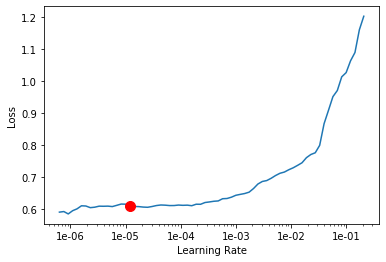

In [7]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [8]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr/40, lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.606208,0.600441,0.141026,01:09
1,0.606503,0.598058,0.136218,01:08
2,0.589624,0.608980,0.141026,01:07
3,0.581157,0.576822,0.120192,01:09
4,0.570330,0.577706,0.123397,01:06


Better model found at epoch 0 with error_rate value: 0.14102564752101898.
Better model found at epoch 1 with error_rate value: 0.13621795177459717.
Better model found at epoch 3 with error_rate value: 0.12019230425357819.


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

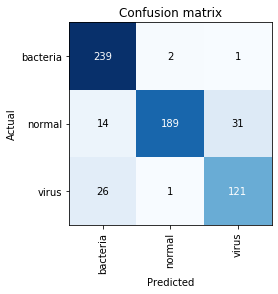

In [10]:
interp.plot_confusion_matrix()

In [11]:
classlist = data.classes
ClassConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

Please enter a value for `k`, or the top images you will see: 5


100%|██████████| 6/6 [01:12<00:00, 12.01s/it]


<Figure size 432x288 with 0 Axes>